In [1]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path=r"/home/paul/Coding/MPT-Calculator-March2024-15/MPT-Calculator"

os.chdir(Your_Path)
os.getcwd()
print(os.environ["MKL_NUM_THREADS"])

from main import main


Solving for order = 5 [5] [1]


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

10.0 0.013298081629586787
save mesh
Updated alpha from OCC file. Alpha=0.01
OCC_Gun_modelv2_nonsym_StainSt.geo
1 air Steel
[0, 1, 2] 3 ['air', 'StainSteel', 'Steel']
Mesh Contains Prisms? True
N Prisms: 5525, N Tets: 21132
1 air Steel
[0, 1, 2] 3 ['air', 'StainSteel', 'Steel']


/home/paul/Coding/MPT-Calculator-March2024-15/MPT-Calculator/main.py:279: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


Running as parallel POD
 mesh contains 26657 elements
Running Bilinear Forms Check
Mesh curve order set to:  5
K: Iteration 1: bonus_intord = 2
K: Iteration 2: bonus_intord = 4
K: Iteration 3: bonus_intord = 6
No convergence - exit loop and switch to linear geometry


/home/paul/Coding/MPT-Calculator-March2024-15/MPT-Calculator/Functions/PrerunChecks/BilinearForms_Check.py:123: UserWarning: K Bilinear Form did not converge. Trying again with linear geometry.
  warnings.warn("K Bilinear Form did not converge. Trying again with linear geometry.")


Running Bilinear Forms Check
Mesh curve order set to:  1
K: Iteration 1: bonus_intord = 2
K: Iteration 2: bonus_intord = 4
K Bilinear Form Converged using order 6
C: Iteration 1: bonus_intord = 2
C: Iteration 2: bonus_intord = 4
C Bilinear Form Converged using order 6


Solving Theta0: 100%|████████████████████| 3/3 [20:26<00:00, 408.85s/it]


 solved theta0 problems   
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|████████| 13/13 [57:32<00:00, 265.59s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 13
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


ValueError: could not broadcast input array from shape (200,) into shape (400,)

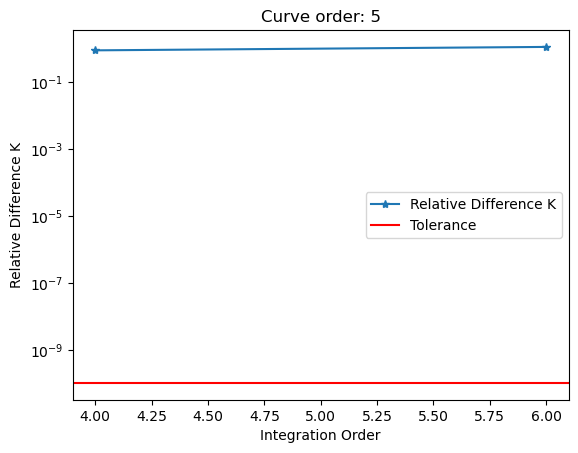

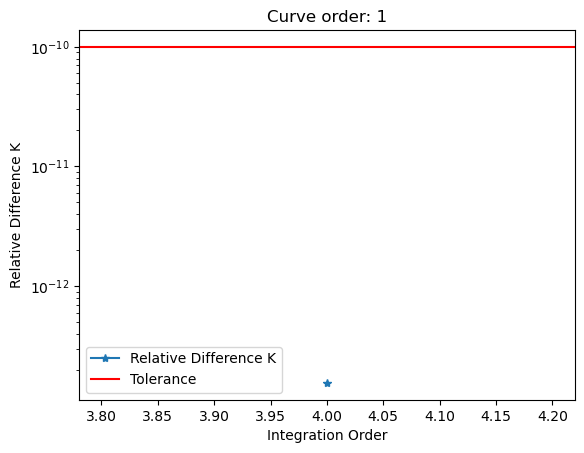

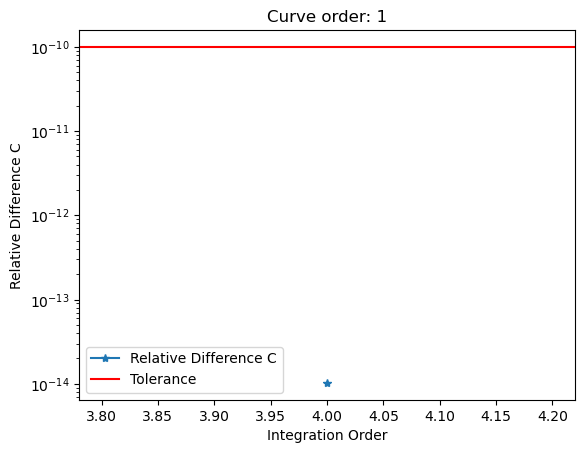

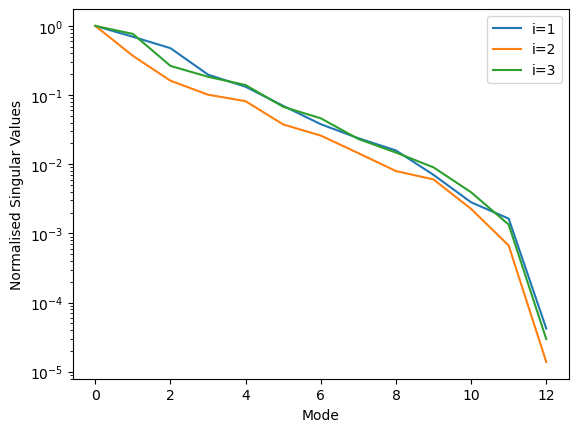

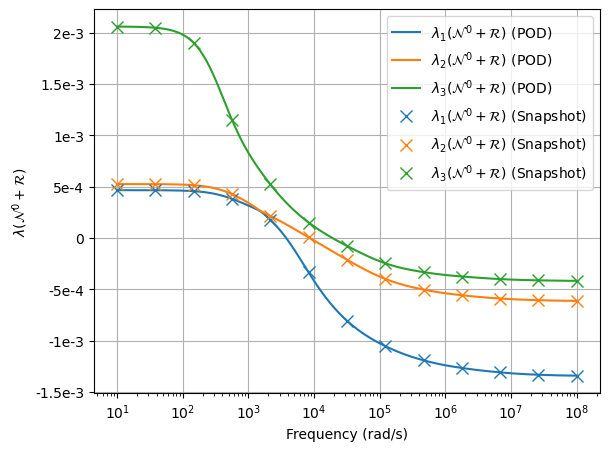

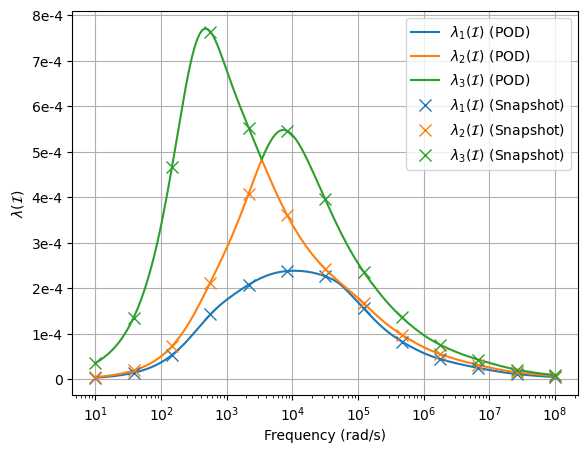

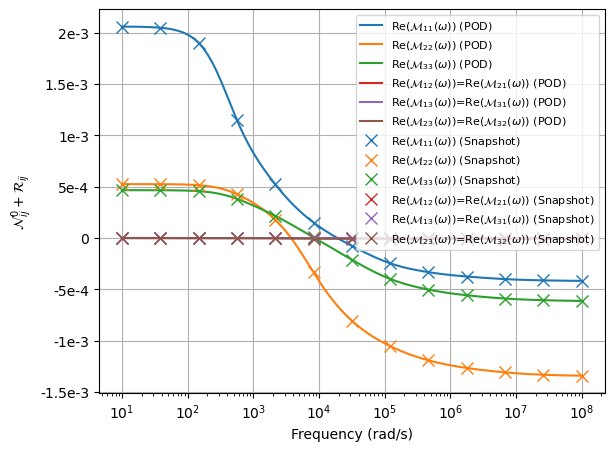

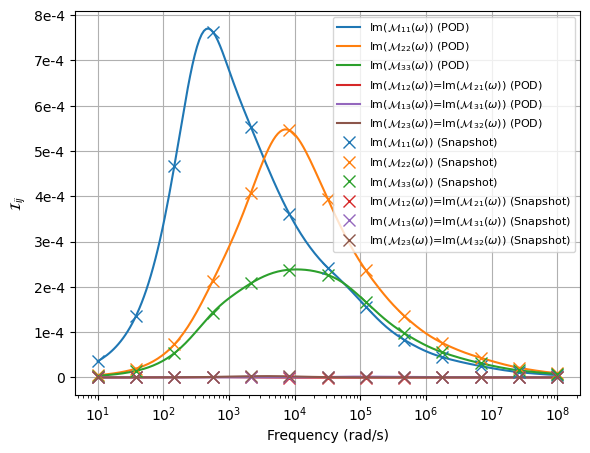

In [2]:
from main import main
comparison_eig_p = np.zeros((400,6), dtype=complex)
comparison_ndofs_p = np.zeros(6)
start_time = time()
P=[0,1,2,3,4,5]
CPU=[4,4,4,3,2]
for count in range(len(P)):
    print('Solving for order =',P[count],P,CPU)
    Return_Dict = main(geometry='OCC_Gun_model_nonym_suite_StainSt_len20.py', use_OCC=True, start_stop=(1,8,200),
                       use_POD=True,order=P[count],cpus=CPU[count])
   
    comparison_eig_p[:,count] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_p[count] = Return_Dict['NDOF'][1]

In [ ]:

frequencies = [3e5]
for f in frequencies:
    freq=[f]
    Return_Dict = main(geometry='OCC_Gun_modelv2_nonsym_StainSt.py', use_OCC=True,order=3,cpus=3,frequency_array=freq);
